## ✅ Step 1: Import Libraries and Load the Dataset

In [1]:
##Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load the dataset
data=pd.read_csv("Salary_Data.csv")

In [3]:
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


## ✅ Step 2: Exploratory Data Analysis (EDA)

In [4]:
# Check for null values
print("\n Null values in the dataset:")
print(data.isnull().sum())


 Null values in the dataset:
YearsExperience    0
Salary             0
dtype: int64


In [5]:
#basic statstics
print("\n dataset statictics:")
print(data.describe())


 dataset statictics:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


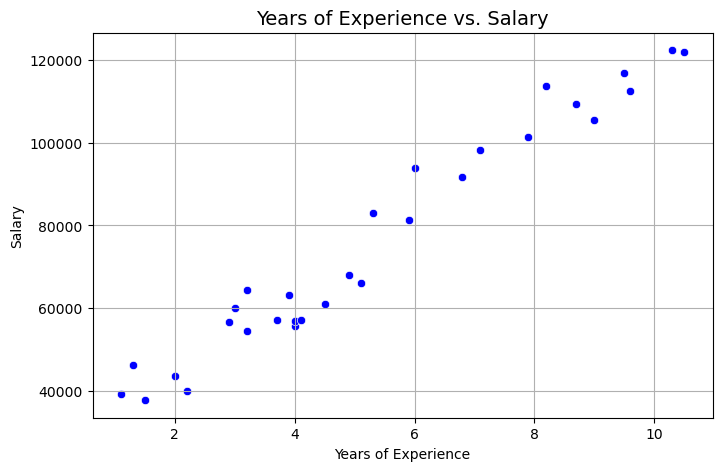

In [6]:
#visualization the data distribution
plt.figure(figsize=(8,5))
sns.scatterplot(x='YearsExperience' ,y='Salary' , data=data ,color='blue' )
plt.title("Years of Experience vs. Salary", fontsize=14)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

## ✅ Step 3: Data Preprocessing (Train/Test Split)

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['YearsExperience']]
y = data['Salary'] 
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


print("\n Data split complete.")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


 Data split complete.
Training samples: 24
Testing samples: 6


## ✅ Step 4: Build and Train the Model

In [8]:
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

LinearRegression()

## ✅ Step 5: Make Predictions and Evaluate the Model

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\n Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


 Model Evaluation:
Mean Squared Error (MSE): 49830096.86
R-squared Score (R²): 0.90


## ✅ Step 6: Visualize the Regression Line

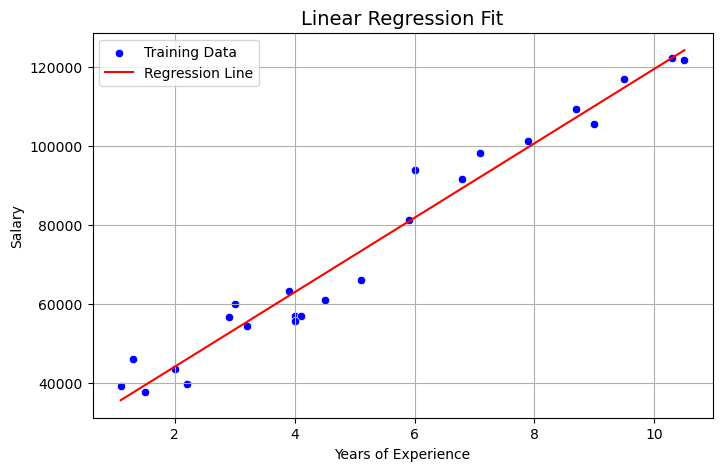

In [10]:
# Plot regression line with the training data
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_train['YearsExperience'], y=y_train, color='blue', label="Training Data")
sns.lineplot(x=X_train['YearsExperience'], y=model.predict(X_train), color='red', label="Regression Line")
plt.title("Linear Regression Fit", fontsize=14)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

## ✅ Step 7: Predict Salary for New Input

In [11]:
# Predict salary for 5 years of experience (proper format with column name)
years_of_exp = pd.DataFrame([[5]], columns=["YearsExperience"])
predicted_salary = model.predict(years_of_exp)

print(f"Predicted salary for 5 years of experience: ${predicted_salary[0]:.2f}")


Predicted salary for 5 years of experience: $72440.66


In [15]:
import pandas as pd
import tkinter as tk
from tkinter import messagebox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# ======== Step 1: Load and train the model ========
# Load dataset
data = pd.read_csv("Salary_Data.csv")

# Features and target
X = data[['YearsExperience']]
y = data['Salary']

# Train/test split (optional for GUI – we’ll train on all)
model = LinearRegression()
model.fit(X, y)

# ======== Step 2: Define GUI application ========
def predict_salary():
    try:
        # Get input value from Entry widget
        years = float(entry.get())

        # Format input for model
        input_df = pd.DataFrame([[years]], columns=["YearsExperience"])
        predicted = model.predict(input_df)[0]

        # Display result
        result_label.config(text=f"💰 Estimated Salary: ${predicted:,.2f}")
    except ValueError:
        messagebox.showerror("Invalid Input", "Please enter a valid number.")

# Create main window
app = tk.Tk()
app.title("Salary Prediction App")
app.geometry("400x250")
app.configure(bg="#f0f0f0")

# Title Label
title = tk.Label(app, text="Salary Predictor", font=("Helvetica", 16, "bold"), bg="#f0f0f0")
title.pack(pady=10)

# Entry Label
entry_label = tk.Label(app, text="Enter Years of Experience:", bg="#f0f0f0")
entry_label.pack()

# Entry Field
entry = tk.Entry(app, width=10, font=("Helvetica", 12))
entry.pack(pady=5)

# Predict Button
predict_button = tk.Button(app, text="Predict Salary", command=predict_salary, bg="#4CAF50", fg="white", font=("Helvetica", 12))
predict_button.pack(pady=10)

# Result Label
result_label = tk.Label(app, text="", font=("Helvetica", 14), bg="#f0f0f0", fg="#333")
result_label.pack(pady=10)

# Run the application
app.mainloop()


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Step 1: Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the features (important for SVR and LinearRegression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Define all regression models
models = {
    "LinearRegression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),  # You can change kernel to 'linear', 'poly', etc.
    "RandomForestRegressor": RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42),
    "GradientBoostingRegressor": GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=5, random_state=42)
}

results = []

# Step 4: Train and evaluate each model
for name, model in models.items():
    # Use scaled data only for models that are sensitive to feature scale
    if name in ['SVR', 'LinearRegression']:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Evaluate using R² (coefficient of determination) and MSE
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Store results
    results.append({
        "Algorithm": name,
        "Train R²": round(train_r2, 3),
        "Test R²": round(test_r2, 3),
        "Train MSE": round(train_mse, 2),
        "Test MSE": round(test_mse, 2)
    })

# Step 5: Show results sorted by best test R² score
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test R²", ascending=False))


                   Algorithm  Train R²  Test R²     Train MSE      Test MSE
0           LinearRegression     0.965    0.902  2.710225e+07  4.983010e+07
2      RandomForestRegressor     0.996    0.882  3.014613e+06  6.019192e+07
3  GradientBoostingRegressor     1.000    0.802  2.817852e+04  1.010473e+08
1                        SVR    -0.189   -0.864  9.089511e+08  9.522175e+08
